In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 데이터 불러오기

In [2]:
train_data_path = join('./data/', 'train.csv')
test_data_path = join('./data/', 'test.csv')

In [3]:
df_train_org = pd.read_csv(train_data_path)
df_test_org = pd.read_csv(test_data_path)

In [4]:
df_train = df_train_org.copy()
df_test = df_test_org.copy()
print('train data shape: {}'.format(df_train.shape))
print('test data shape: {}'.format(df_test.shape))

train data shape: (15035, 21)
test data shape: (6468, 20)


# 데이터 확인, 전처리

<Axes: xlabel='price', ylabel='Density'>

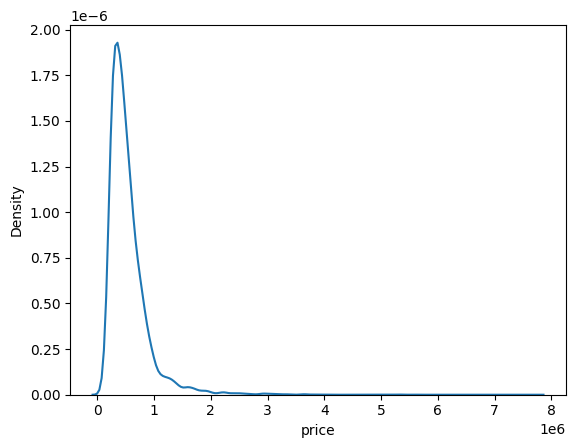

In [5]:
sns.kdeplot(df_train['price'])

In [6]:
# 집값 log1p
df_train['price'] = np.log1p(df_train['price'])

<Axes: xlabel='price', ylabel='Density'>

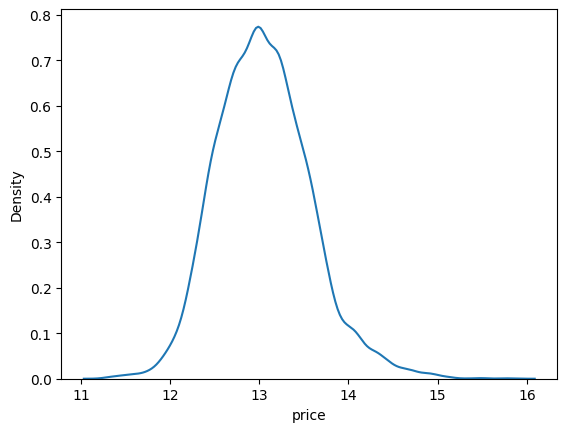

In [7]:
sns.kdeplot(df_train['price'])

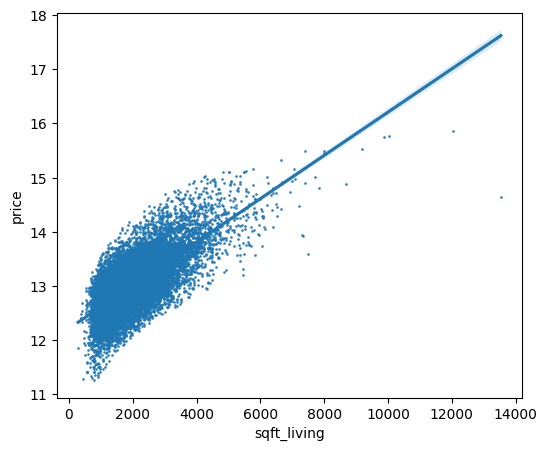

In [8]:
# 거실 크기에 따른 집값
data = pd.concat([df_train['price'], df_train['sqft_living']], axis=1)
f, ax = plt.subplots(figsize=(6, 5))
fig = sns.regplot(x='sqft_living', y="price", data=data, scatter_kws={"s": 1})

In [9]:
df_train.loc[df_train['sqft_living'] > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5108,5108,20141013T000000,15.856731,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8912,8912,20140505T000000,14.639686,7,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [10]:
df_train = df_train.loc[df_train['id'] != 8912]

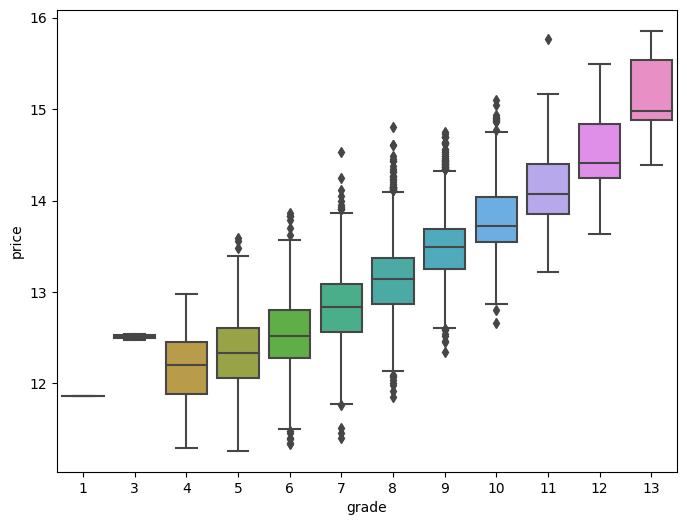

In [11]:
# 등급에 따른 집값
data = pd.concat([df_train['price'], df_train['grade']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='grade', y="price", data=data)

In [12]:
df_train.loc[(df_train['price'] > 12) & (df_train['grade'] == 3)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2302,2302,20150225T000000,12.476104,1,0.75,520,12981,1.0,0,0,...,3,520,0,1920,0,98022,47.2082,-121.995,1340,12233
4123,4123,20141104T000000,12.542548,1,0.00,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549


In [13]:
df_train.loc[(df_train['price'] > 14.5) & (df_train['grade'] == 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
12346,12346,20150115T000000,14.533351,4,3.25,3580,19989,1.5,1,4,...,7,3480,100,1915,1965,98125,47.7087,-122.276,2410,6389


In [14]:
df_train.loc[(df_train['price'] > 14.5) & (df_train['grade'] == 8)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
983,983,20150511T000000,14.603968,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200
7173,7173,20140813T000000,14.808763,5,4.00,4230,27295,2.0,1,4,...,8,3230,1000,1949,1985,98033,47.6803,-122.214,2660,27295
10037,10037,20140825T000000,14.603968,3,2.00,3570,30456,1.0,0,1,...,8,2070,1500,1946,1982,98039,47.6413,-122.240,3570,27418


In [15]:
df_train.loc[(df_train['price'] > 15.5) & (df_train['grade'] == 11)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2775,2775,20140611T000000,15.77031,5,4.5,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.65,-122.214,3930,25449


In [16]:
# 이상치..로 보이는 값들 제거
df_train = df_train.loc[df_train['id']!=2302]
df_train = df_train.loc[df_train['id']!=4123]
#df_train = df_train.loc[df_train['id']!=12346]  # ?
df_train = df_train.loc[df_train['id']!=7173]
df_train = df_train.loc[df_train['id']!=2775]

# 정규화

In [17]:
log1p_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in log1p_columns:
    df_train[c] = np.log1p(df_train[c].values)
    df_test[c] = np.log1p(df_test[c].values)

In [18]:
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,12.309987,1.386294,1.00,7.074117,8.639588,1.0,0,0,...,7,7.074117,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,12.100718,1.098612,1.00,6.647688,9.210440,1.0,0,0,...,6,6.647688,0.0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,13.142168,1.386294,2.00,7.427144,8.997271,1.0,0,0,...,8,7.427144,0.0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,12.458779,1.386294,2.25,7.447751,8.827615,2.0,0,0,...,7,7.447751,0.0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,12.583999,1.386294,1.50,6.966967,9.181118,1.0,0,0,...,7,6.966967,0.0,1963,0,98198,47.4095,-122.315,1650,9711


In [19]:
for df in [df_train,df_test]:
    df['date'] = df['date'].apply(lambda x: x[0:8])  # 날짜 형식 변경
    df['yr_renovated'] = df['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)  # 0값 확인
    df['yr_renovated'] = df['yr_renovated'].fillna(df['yr_built'])  # 값 없으면 yr_built

In [20]:
for df in [df_train,df_test]:
    
    # 방의 전체 갯수 
    df['total_rooms'] = df['bedrooms'] + df['bathrooms']    

    # 거실의 비율 
    df['sqft_ratio'] = df['sqft_living'] / df['sqft_lot']    
    df['sqft_total_size'] = df['sqft_above'] + df['sqft_basement']
    
    # 면적 대비 거실의 비율 
    df['sqft_ratio_1'] = df['sqft_living'] / df['sqft_total_size']    
    df['sqft_ratio15'] = df['sqft_living15'] / df['sqft_lot15'] 
    
    # 재건축 여부 
    df['is_renovated'] = df['yr_renovated'] - df['yr_built']
    df['is_renovated'] = df['is_renovated'].apply(lambda x: 0 if x == 0 else 1)
    
    df['date'] = df['date'].astype('int')

In [21]:
# 크기 당 집값
df_train['per_price'] = df_train['price'] / df_train['sqft_total_size']

# zipcode 평균, 분산
zipcode_price = df_train.groupby(['zipcode'])['per_price'].agg({'mean','var'}).reset_index()

df_train = pd.merge(df_train, zipcode_price, how='left', on='zipcode')
df_test = pd.merge(df_test, zipcode_price, how='left', on='zipcode')

# 크게에 따른 zipcode 평균, 분산
for df in [df_train,df_test]:
    df['zipcode_mean'] = df['mean'] * df['sqft_total_size']
    df['zipcode_var'] = df['var'] * df['sqft_total_size']
    del df['mean']; del df['var']

In [22]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'total_rooms',
       'sqft_ratio', 'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15',
       'is_renovated', 'per_price', 'zipcode_mean', 'zipcode_var'],
      dtype='object')

In [23]:
# 학습 데이터로 복사
X = df_train.copy()

In [24]:
# 테스트 데이터로 복사
Xt = df_test.copy()

In [25]:
# 학습 데이터에서 price 분리
y = X['price']
del X['price']  # 삭제

print(X.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'per_price', 'zipcode_mean', 'zipcode_var'],
      dtype='object')


In [26]:
del X['per_price']

print(X.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'total_rooms', 'sqft_ratio',
       'sqft_total_size', 'sqft_ratio_1', 'sqft_ratio15', 'is_renovated',
       'zipcode_mean', 'zipcode_var'],
      dtype='object')


# 모델링

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [28]:
from sklearn.ensemble import VotingRegressor

In [29]:
random_state=2020

In [30]:
# RMSE
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

VotingRegressor

In [39]:
# voting models
xgb = XGBRegressor(learning_rate=0.024, max_depth=8, n_estimators=1000, random_state=random_state)
lgbm0 = LGBMRegressor(boosting='goss', learning_rate=0.015, max_depth=7, n_estimators=1600, random_state=random_state, boost_from_average=False)
lgbm1 = LGBMRegressor(boosting='gbdt', learning_rate=0.015, max_depth=13, n_estimators=1400, random_state=random_state, boost_from_average=False)
lgbm2 = LGBMRegressor(boosting='goss', learning_rate=0.015, max_depth=7, n_estimators=1400, random_state=random_state, boost_from_average=False)
lgbm3 = LGBMRegressor(boosting='gbdt', learning_rate=0.015, max_depth=11, n_estimators=1400, random_state=random_state, boost_from_average=False)

# voting regressor
vr = VotingRegressor(estimators=[('xgb', xgb), ('lgbm0', lgbm0), ('lgbm1', lgbm1), ('lgbm2', lgbm2), ('lgbm3', lgbm3)])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state)

In [40]:
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate...
                                           boosting='gbdt', learning_rate=0.015,
                                           max_depth=13, n_estimators=1400,
                                           random_state=2020)),
                            ('lgbm2',
                             LGBMRegressor(boost_from_average=False,
                                           boosting='goss', learning_rate=0.015,
                                           max_depth=7, n_estimators=1400,
                                           random_state=2020)),
                            ('lgbm3',
                             LGBMRegressor(boost_from_average=False,
                                           boosting='gbdt', learning_rate=0.015,
                                           max_depth=11, n_estimators=1400,
                                           random_state=2020))])

In [41]:
vr_pred = vr.predict(X_test)

In [42]:
vr_rmse = rmse(y_test, vr_pred)

In [43]:
vr_rmse

105376.65413529065

In [44]:
kfold = KFold(n_splits=5, 
              shuffle=True, 
              random_state=random_state).get_n_splits(X.values)

In [45]:
print("CV score : {:.4f}".format(np.mean(cross_val_score(vr, X, y)),kf=kfold))

[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
CV score : 0.9075


# 예측값 생성

In [50]:
def save_submission(model, test, model_name, error):

    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    
    data_dir = './data'
    submission_path = join(data_dir, 'sample_submission.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_{}.csv'.format(data_dir, model_name, error)
    submission.to_csv(submission_csv_path, index=False)
    print(submission_csv_path)

In [51]:
save_submission(vr, Xt, 'vr', error='rmse_105376')

./data/submission_vr_rmse_105376.csv


# kaggle score

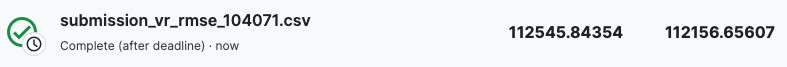

In [47]:
from IPython import display
display.Image("./kaggle_score.png")